------------------------------------------------ 데이터 로딩 ------------------------------------------------ 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
# 데이터 로드
train = pd.read_csv('/Users/jaesolshin/내 드라이브/2024-2/Google ML Bootcamp2024/data/playground1/train.csv')

In [33]:
# 전체 데이터의 인덱스 생성
indices = np.arange(train.shape[0])

# 99:1 비율로 train, valid 분할
train_id, valid_id = train_test_split(indices, test_size=0.01, random_state=42)

# train에서 10000개, valid에서 1000개 샘플링
train_sample_id = np.random.choice(train_id, 10000, replace=False)
valid_sample_id = np.random.choice(valid_id, 1000, replace=False)

# train_x, train_y, valid_x, valid_y 생성
train_x = train.iloc[train_sample_id, :-1]
train_y = train.iloc[train_sample_id, -1]
valid_x = train.iloc[valid_sample_id, :-1]
valid_y = train.iloc[valid_sample_id, -1]

print("Train sample X shape:", train_x.shape)
print("Train sample Y shape:", train_y.shape)
print("Valid sample X shape:", valid_x.shape)
print("Valid sample Y shape:", valid_y.shape)

Train sample X shape: (10000, 11)
Train sample Y shape: (10000,)
Valid sample X shape: (1000, 11)
Valid sample Y shape: (1000,)


------------------------------------------------ 여기서부터 데이터 확인 및 전처리 ------------------------------------------------

In [34]:
train_x.head()
train_x.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN
freq,NaN,5460,NaN,NaN,NaN,NaN,5170,5062,NaN,NaN,NaN
mean,5.791041e+06,NaN,38.309100,0.998500,26.410600,0.463100,NaN,NaN,30390.939100,113.287900,163.479400
std,3.306493e+06,NaN,15.012065,0.038703,12.992863,0.498661,NaN,NaN,16356.570387,53.556322,79.917191
min,4.240000e+02,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000
25%,2.943422e+06,NaN,24.000000,1.000000,15.000000,0.000000,NaN,NaN,25176.000000,43.500000,98.000000
50%,5.805411e+06,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31715.000000,151.000000,166.000000
75%,8.654304e+06,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39366.000000,152.000000,232.000000


In [35]:
train_x['Driving_License'].value_counts() #면허 미소지자도 드물게 존재

Driving_License
1    9985
0      15
Name: count, dtype: int64

In [36]:
train_y.value_counts()

Response
0    8763
1    1237
Name: count, dtype: int64

In [37]:
# 범주형 변수들만 따로 확인
train_x.iloc[:10,[1,3,4,5,6,7,9]] 

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
2812995,Male,1,30.0,1,1-2 Year,No,140.0
9653826,Male,1,8.0,1,< 1 Year,No,152.0
3756146,Female,1,35.0,0,< 1 Year,Yes,160.0
7295846,Female,1,50.0,1,< 1 Year,No,152.0
8780476,Male,1,28.0,0,1-2 Year,Yes,26.0
990191,Female,1,28.0,0,1-2 Year,Yes,26.0
1022727,Female,1,8.0,0,1-2 Year,Yes,7.0
1091953,Male,1,15.0,1,< 1 Year,No,152.0
9341193,Male,1,28.0,1,1-2 Year,No,125.0
8205635,Female,1,8.0,0,1-2 Year,Yes,154.0


In [38]:
# 범주형 변수를 팩터로 변환 (카테고리형)
train_x.iloc[:,[1,3,4,5,6,7,9]].apply(lambda x: x.astype('category'))
valid_x.iloc[:,[1,3,4,5,6,7,9]].apply(lambda x: x.astype('category'))

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
2187507,Male,1,8.0,0,< 1 Year,No,152.0
7032086,Male,1,28.0,1,1-2 Year,Yes,124.0
4603569,Male,1,14.0,0,1-2 Year,Yes,157.0
6261642,Male,1,28.0,0,1-2 Year,Yes,61.0
5480040,Male,1,38.0,1,1-2 Year,No,26.0
...,...,...,...,...,...,...,...
2176172,Male,1,37.0,0,< 1 Year,Yes,152.0
2451558,Male,1,6.0,0,1-2 Year,Yes,156.0
6576214,Female,1,36.0,1,< 1 Year,No,152.0
2515429,Female,1,35.0,1,< 1 Year,No,160.0


In [39]:
# 결측치 파악
print(train_x.isnull().sum()) #결측 없음
print(valid_x.isnull().sum()) #결측 없음

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


In [40]:
# 연속형 변수만 선택
train_x.iloc[:10,[2,8,10]]

,Age,Annual_Premium,Vintage
2812995,45,23790.0,135
9653826,25,39662.0,191
3756146,22,28982.0,182
7295846,23,29567.0,228
8780476,65,51656.0,238
990191,65,48478.0,236
1022727,58,47979.0,97
1091953,21,27607.0,217
9341193,72,2630.0,228
8205635,33,2630.0,116


In [41]:
# IQR 기반 이상치 탐지 함수
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# 연속형 변수들에 대해 이상치 수 계산
print(outliers(train_x.iloc[:,[2,8,10]]).sum())


Age                  0
Annual_Premium    2070
Vintage              0
dtype: int64


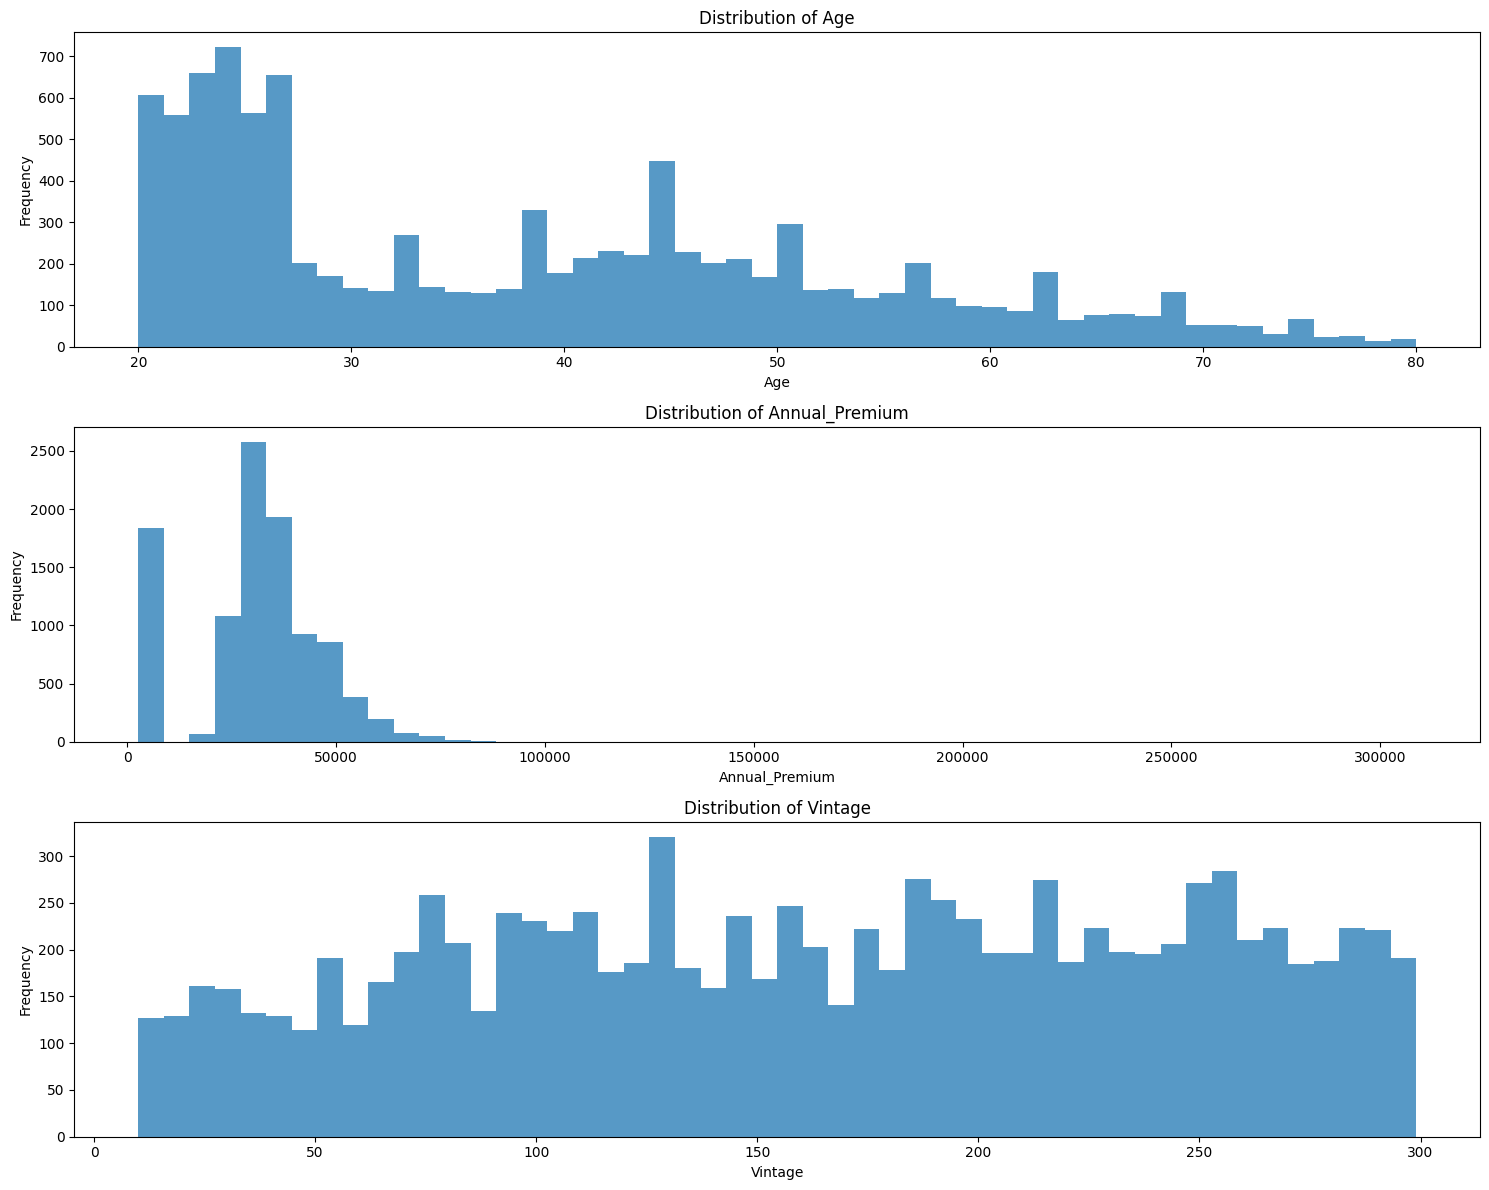

In [42]:
#연속형 변수들 시각화
fig, axes = plt.subplots(nrows=3, figsize=(15, 12))
axes = axes.flatten()

# 각 변수의 히스토그램 그리기
for ax, column in zip(axes, train_x.iloc[:,[2,8,10]]):
    ax.hist(train_x[column], bins=50, alpha=0.75)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()

#Annual_Premium 변수의 min값이 정규분포에서 크게 튀어보이는 것을 확인할 수 있음

In [43]:
#튀어보이는 수치는 0이 아닌 2630.0
print(train_x["Annual_Premium"].min())
print(train_x["Annual_Premium"].min())

#이상치로 판단된 값 또한 대부분 2630.0
train_x.loc[outliers(train_x["Annual_Premium"]),"Annual_Premium"].value_counts()

2630.0
2630.0


Annual_Premium
2630.0     1839
70720.0       3
69856.0       2
61390.0       2
62738.0       2
           ... 
71483.0       1
68468.0       1
61795.0       1
75538.0       1
63332.0       1
Name: count, Length: 222, dtype: int64

In [44]:
# 이분변수 생성: "Annual_Premium" == 2630.0 인 경우
train_x['Annual_Premium_Binary'] = (train_x['Annual_Premium'] == 2630.0).astype('category')
valid_x['Annual_Premium_Binary'] = (valid_x['Annual_Premium'] == 2630.0).astype('category')

# 로그 변환된 "Annual_Premium" 변수 생성
train_x['Annual_Premium_Log'] = np.log1p(train_x['Annual_Premium'])
valid_x['Annual_Premium_Log'] = np.log1p(valid_x['Annual_Premium'])

#생성된 변수 확인
train_x.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_Binary,Annual_Premium_Log
2812995,2812995,Male,45,1,30.0,1,1-2 Year,No,23790.0,140.0,135,False,10.077063
9653826,9653826,Male,25,1,8.0,1,< 1 Year,No,39662.0,152.0,191,False,10.588174
3756146,3756146,Female,22,1,35.0,0,< 1 Year,Yes,28982.0,160.0,182,False,10.274465
7295846,7295846,Female,23,1,50.0,1,< 1 Year,No,29567.0,152.0,228,False,10.294448
8780476,8780476,Male,65,1,28.0,0,1-2 Year,Yes,51656.0,26.0,238,False,10.852381


In [45]:
# 정규화
# StandardScaler, MinMaxScaler, RobustScaler 중에서 선택
from sklearn.preprocessing import StandardScaler

# 최소-최대 정규화 (Min-Max 스케일링)
scaler = StandardScaler()
train_x.iloc[:,[2,8,10]] = scaler.fit_transform(train_x.iloc[:,[2,8,10]])
valid_x.iloc[:,[2,8,10]] = scaler.fit_transform(valid_x.iloc[:,[2,8,10]])

train_x.head()


/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29914/2008341578.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.4457238  -0.88660458 -1.08645384 ... -1.08645384 -0.35367323
  0.84542231]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_x.iloc[:,[2,8,10]] = scaler.fit_transform(train_x.iloc[:,[2,8,10]])
/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29914/2008341578.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.35637919  0.34438117  0.23175897 ...  1.02011438 -0.51905571
 -1.4325469 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_x.iloc[:,[2,8,10]] = scaler.fit_transform(train_x.iloc[:,[2,8,10]])
/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29914/2008341578.py:8: FutureWarning: Setting an item o

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_Binary,Annual_Premium_Log
2812995,2812995,Male,0.445724,1,30.0,1,1-2 Year,No,-0.403585,140.0,-0.356379,False,10.077063
9653826,9653826,Male,-0.886605,1,8.0,1,< 1 Year,No,0.566838,152.0,0.344381,False,10.588174
3756146,3756146,Female,-1.086454,1,35.0,0,< 1 Year,Yes,-0.086143,160.0,0.231759,False,10.274465
7295846,7295846,Female,-1.019837,1,50.0,1,< 1 Year,No,-0.050376,152.0,0.807384,False,10.294448
8780476,8780476,Male,1.778052,1,28.0,0,1-2 Year,Yes,1.300158,26.0,0.932519,False,10.852381


In [46]:
# 예측에 필요 없는 'id'와 'Annual_Premium' 변수를 드롭
train_x = train_x.drop(columns=['id', 'Annual_Premium'])
valid_x = valid_x.drop(columns=['id', 'Annual_Premium'])

# 원-핫 인코딩 (One-Hot Encoding)
train_x = pd.get_dummies(train_x, columns=['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Binary'])
valid_x = pd.get_dummies(valid_x, columns=['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Annual_Premium_Binary'])

# train_x와 valid_x가 동일한 열을 가지도록 조정
train_x, valid_x = train_x.align(valid_x, join='left', axis=1, fill_value=0)

#생성된 변수 확인
train_x.head()

,Age,Vintage,Annual_Premium_Log,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Region_Code_0.0,Region_Code_1.0,Region_Code_2.0,...,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0,Annual_Premium_Binary_False,Annual_Premium_Binary_True
2812995,0.445724,-0.356379,10.077063,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9653826,-0.886605,0.344381,10.588174,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3756146,-1.086454,0.231759,10.274465,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7295846,-1.019837,0.807384,10.294448,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8780476,1.778052,0.932519,10.852381,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


------------------------------------------------ 이제 드디어 모델링 ------------------------------------------------

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# 시작 시간 기록
start_time = time.time()

# 로지스틱 회귀 모델 생성 및 학습
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(train_x, train_y)

# 검증 데이터에 대해 예측
valid_y_pred = logistic_model.predict(valid_x)

# 성능 평가
accuracy = accuracy_score(valid_y, valid_y_pred)
conf_matrix = confusion_matrix(valid_y, valid_y_pred)
class_report = classification_report(valid_y, valid_y_pred)

# 종료 시간 기록
end_time = time.time()
execution_time = end_time - start_time

# 결과 출력
print(accuracy)
print(conf_matrix)
print(class_report)
print("실행 시간: %f초" %execution_time)

0.878
[[878   3]
 [119   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       881
           1       0.00      0.00      0.00       119

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.82      1000

실행 시간: 1.160418초


가장 단순한 로지스틱 회귀 결과 0.878의 정확도를 얻었다. 그러나 119개 참값 중 불과 0개를 맞춰 형편 없는 재현율(Recall)을 보이고 있다.